# Unit 2 End Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_friedman1
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder,StandardScaler

import DataProcessing as dp

In [2]:
processor = dp.DataProcessing()
processor.loadFrom_CSV("AusApparalSales4thQrt2020.csv")
print(processor.get_info())


 Column: Date - Data Type object
 Column: Time - Data Type object
 Column: State - Data Type object
 Column: Group - Data Type object
 Column: Unit - Data Type int64
 Column: Sales - Data Type int64



In [3]:
missing_data = processor.locateMissingData()

if len(missing_data) == 0 :
    print("No missing data was detected.")
else:
    for key in missing_data.keys():
        print(f'Column: {key} data was missing for indexes {missing_data[key]}')

No missing data was detected.


In [4]:
#processor.processObjectDataTypes(excluded_parameters=["Date"])
print(processor.get_info())
print(processor.get_copy().head())

 Column: Date - Data Type object
 Column: Time - Data Type object
 Column: State - Data Type object
 Column: Group - Data Type object
 Column: Unit - Data Type int64
 Column: Sales - Data Type int64

         Date        Time State     Group  Unit  Sales
0  1-Oct-2020     Morning    WA      Kids     8  20000
1  1-Oct-2020     Morning    WA       Men     8  20000
2  1-Oct-2020     Morning    WA     Women     4  10000
3  1-Oct-2020     Morning    WA   Seniors    15  37500
4  1-Oct-2020   Afternoon    WA      Kids     3   7500


In [5]:
processor.processNumericDataTypes()
print(processor.get_info())

 Column: Date - Data Type object
 Column: Time - Data Type object
 Column: State - Data Type object
 Column: Group - Data Type object
 Column: Unit - Data Type int8
 Column: Sales - Data Type int64



In [6]:
processor.processDateTimeParameters("Date",format="%d-%b-%Y")
print(processor.get_info())
print(processor.get_copy().head())

 Column: Date - Data Type datetime64[ns]
 Column: Time - Data Type object
 Column: State - Data Type object
 Column: Group - Data Type object
 Column: Unit - Data Type int8
 Column: Sales - Data Type int64
 Column: Date_Year - Data Type int16
 Column: Date_Month - Data Type int16
 Column: Date_Day - Data Type int16
 Column: Date_hour - Data Type int16
 Column: Date_Min - Data Type int16
 Column: Date_sec - Data Type int16
 Column: Date_micro - Data Type int16

        Date        Time State     Group  Unit  Sales  Date_Year  Date_Month  \
0 2020-10-01     Morning    WA      Kids     8  20000       2020          10   
1 2020-10-01     Morning    WA       Men     8  20000       2020          10   
2 2020-10-01     Morning    WA     Women     4  10000       2020          10   
3 2020-10-01     Morning    WA   Seniors    15  37500       2020          10   
4 2020-10-01   Afternoon    WA      Kids     3   7500       2020          10   

   Date_Day  Date_hour  Date_Min  Date_sec  Date_micro

In [7]:
#processor.processWithStandardScaler()
#print(processor.get_scaled_data().head())

# Data Analysis

### Units

In [8]:
print(processor.describe("Unit"))

count    7560.000000
mean       18.005423
std        12.901403
min         2.000000
25%         8.000000
50%        14.000000
75%        26.000000
max        65.000000
Name: Unit, dtype: float64


#### Units by States

In [9]:
group_data = processor.get_groupby_data(["State"])
group_data = group_data["Unit"].sum()

#group_data = processor.get_groupby_data(["State"])
print(group_data)

State
NSW    29988
NT      9032
QLD    13367
SA     23543
TAS     9104
VIC    42226
WA      8861
Name: Unit, dtype: int64


Units by States and Group

In [10]:
group_data = processor.get_groupby_data(["State","Group"])
group_data = group_data["Unit"].sum()
print(group_data)

State  Group  
NSW    Kids        7435
       Men         7609
       Seniors     7275
       Women       7669
NT     Kids        2280
       Men         2305
       Seniors     2186
       Women       2261
QLD    Kids        3404
       Men         3357
       Seniors     3276
       Women       3330
SA     Kids        5806
       Men         5862
       Seniors     5887
       Women       5988
TAS    Kids        2310
       Men         2303
       Seniors     2260
       Women       2231
VIC    Kids       10544
       Men        10563
       Seniors    10526
       Women      10593
WA     Kids        2250
       Men         2301
       Seniors     2205
       Women       2105
Name: Unit, dtype: int64


Max Unit Sale by State and group

In [11]:
group_data = processor.get_groupby_data(["State","Group"])
group_data = group_data["Unit"].max()
print(group_data)

State  Group  
NSW    Kids       45
       Men        45
       Seniors    45
       Women      45
NT     Kids       15
       Men        15
       Seniors    15
       Women      15
QLD    Kids       25
       Men        25
       Seniors    25
       Women      25
SA     Kids       35
       Men        35
       Seniors    35
       Women      35
TAS    Kids       15
       Men        15
       Seniors    15
       Women      15
VIC    Kids       65
       Men        64
       Seniors    65
       Women      65
WA     Kids       15
       Men        15
       Seniors    15
       Women      15
Name: Unit, dtype: int8


Min Unit Sales by State and group

In [12]:
group_data = processor.get_groupby_data(["State","Group"])
group_data = group_data["Unit"].min()
print(group_data)

State  Group  
NSW    Kids       12
       Men        12
       Seniors    12
       Women      12
NT     Kids        2
       Men         2
       Seniors     2
       Women       2
QLD    Kids        3
       Men         3
       Seniors     3
       Women       3
SA     Kids       10
       Men        10
       Seniors    10
       Women      10
TAS    Kids        2
       Men         2
       Seniors     2
       Women       2
VIC    Kids       20
       Men        20
       Seniors    20
       Women      20
WA     Kids        2
       Men         2
       Seniors     2
       Women       2
Name: Unit, dtype: int8


Sales by Year and Month

In [13]:
group_data = processor.get_groupby_data(["Date_Year","Date_Month"])
group_data = group_data["Unit"].sum()
print(group_data)
group_data = processor.get_groupby_data(["Date_Year","Date_Month","Date_Day"])
group_data = group_data["Unit"].sum()
df_group_data = group_data.reset_index()
print(df_group_data)

Date_Year  Date_Month
2020       10            45716
           11            36273
           12            54132
Name: Unit, dtype: int64
    Date_Year  Date_Month  Date_Day  Unit
0        2020          10         1  1488
1        2020          10         2  1486
2        2020          10         3  1556
3        2020          10         4  1488
4        2020          10         5  1545
..        ...         ...       ...   ...
85       2020          12        26  1886
86       2020          12        27  1855
87       2020          12        28  1838
88       2020          12        29  1843
89       2020          12        30  1836

[90 rows x 4 columns]


# Visualize Data

    Date_Year  Date_Month  Date_Day  Unit
0        2020          10         1  1488
1        2020          10         2  1486
2        2020          10         3  1556
3        2020          10         4  1488
4        2020          10         5  1545
..        ...         ...       ...   ...
85       2020          12        26  1886
86       2020          12        27  1855
87       2020          12        28  1838
88       2020          12        29  1843
89       2020          12        30  1836

[90 rows x 4 columns]


Text(0, 0.5, 'Unit')

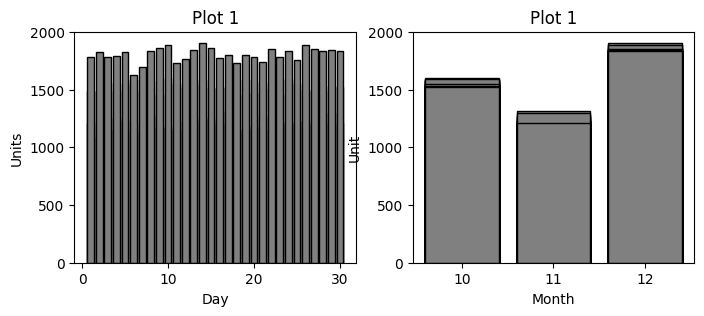

In [21]:
group_data = processor.get_groupby_data(["Date_Year","Date_Month","Date_Day"])
group_data = group_data["Unit"].sum()

df = group_data.reset_index()

print(df)
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

axes[0].set_title('Plot 1')
axes[0].bar(df["Date_Day"],df["Unit"], edgecolor='black', color='grey')
axes[0].set_xlabel("Day")
axes[0].set_ylabel('Units')

axes[1].set_title('Plot 1')
axes[1].bar(df["Date_Month"],df["Unit"], edgecolor='black', color='grey')
axes[1].set_xlabel("Month")
axes[1].set_ylabel('Unit')
